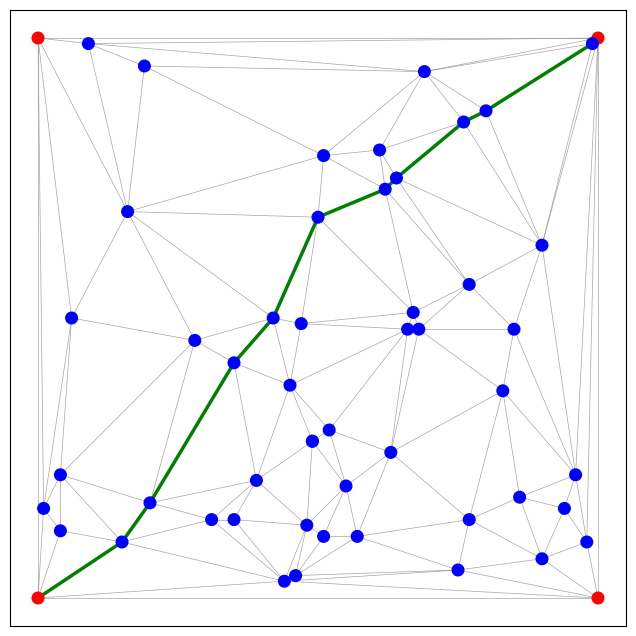

In [1]:
from src.point_generator import generate_points
from src.graph_builder import build_graph
from src.visualizer import draw_graph_with_shortest_path

# 1. Generate points
num_random_points = 50
limit = 100
points, fixed_node_indices = generate_points(
    high=limit, num_random_points=num_random_points
)

# 2. Build graph
road = build_graph(points)

# 4. Visualize graph with shortest path
draw_graph_with_shortest_path(road, points, fixed_node_indices)


In [8]:
road.edges([35])

EdgeDataView([(35, 23), (35, 47), (35, 18), (35, 3), (35, 21), (35, 49), (35, 4), (35, 32)])

In [5]:
for id,coord in road.nodes(data=True):
    print(id,coord)

0 {'coordinate': array([0, 0])}
1 {'coordinate': array([100, 100])}
2 {'coordinate': array([100,   0])}
3 {'coordinate': array([  0, 100])}
4 {'coordinate': array([50, 68])}
5 {'coordinate': array([31, 14])}
6 {'coordinate': array([64, 75])}
7 {'coordinate': array([80, 87])}
8 {'coordinate': array([86, 18])}
9 {'coordinate': array([57, 11])}
10 {'coordinate': array([49, 28])}
11 {'coordinate': array([47, 49])}
12 {'coordinate': array([76, 85])}
13 {'coordinate': array([35, 42])}
14 {'coordinate': array([90,  7])}
15 {'coordinate': array([99, 99])}
16 {'coordinate': array([52, 30])}
17 {'coordinate': array([77, 56])}
18 {'coordinate': array([ 6, 50])}
19 {'coordinate': array([68, 48])}
20 {'coordinate': array([61, 80])}
21 {'coordinate': array([ 9, 99])}
22 {'coordinate': array([44,  3])}
23 {'coordinate': array([19, 95])}
24 {'coordinate': array([ 1, 16])}
25 {'coordinate': array([77, 14])}
26 {'coordinate': array([85, 48])}
27 {'coordinate': array([63, 26])}
28 {'coordinate': array([5

In [9]:
from itertools import combinations